In [1]:
import utils as util
import ploting as draw
import random
import numpy as np

In [2]:
world = util.generate_world(None, 2)

In [3]:
def generate_world(seed, features, feature_bounds = (0, 1), endT = .2, endA = .3, max_depth = 4, class_number = 2):
    random.seed(seed)
    np.random.seed(seed)
    world_coords = util.generate_world_bounds(features = features, feature_bounds = feature_bounds, endT = endT, endA = endA, max_depth = max_depth)
    bounds_with_class = {}
    random_list = list(np.arange(class_number)) + [random.randint(0, class_number - 1) for _ in range(len(world_coords) - class_number)]
    np.random.shuffle(random_list)
    for i, bounds in zip(random_list, world_coords):
        bounds_with_class[bounds] = i
    return util.generate_true_values(bounds_with_class, feature_bounds)
    

In [4]:
def add_noise_old(tv, errRange = 1, mutation_rate = 0):
    
    def add_unc_single_value(tv, errRange, mutation_rate):
        rv = random.random() if random.random() < mutation_rate else tv 
        rv += errRange * random.uniform(-1, 1)
        return rv
    
    def add_unc_array(tv, errRange, mutation_rate):
        rv = []
        for t in tv:
            rv.append(add_unc_single_value(t, errRange, mutation_rate))
        return np.array(rv)
    
    try:
        iter(tv)
    except:
        _add_unc = add_unc_single_value
    else:
        _add_unc = add_unc_array
    
    return _add_unc(tv, errRange, mutation_rate)

In [20]:
def add_noise(world, errRange = 1, mutation_rate = 0):
    _, n_feat = world[:, 1:].shape
    for i, cls_feat in enumerate(world):
        mutation = True if random.random() < mutation_rate else False
        if mutation:
            for j in range(1, n_feat + 1):
                cls_feat[j] = random.random() + errRange * random.uniform(-1, 1)
        else:
            for j in range(1, n_feat + 1):
                cls_feat[j] += errRange * random.uniform(-1, 1)
        world[i] = cls_feat
    return world

In [5]:
import matplotlib.pyplot as plt

def draw_combined_world(data, sample_data = None, cmap='viridis'):    
    # Extracting data for the true world
    true_classes = data[:, 0]
    true_f1 = data[:, 1]
    true_f2 = data[:, 2]
    
    # Extracting data for the observed worlds
    real_f1 = data[:, 3]
    real_f2 = data[:, 4]
    
    minf1 = np.min([true_f1, real_f1])
    maxf1 = np.max([true_f1, real_f1])
    minf2 = np.min([true_f2, real_f2])
    maxf2 = np.max([true_f2, real_f2])
    
    # Creating subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
        
    axs[0].set_xlim(minf1, maxf1)
    axs[1].set_xlim(minf1, maxf1)
    
    axs[0].set_ylim(minf2, maxf2)
    axs[1].set_ylim(minf2, maxf2)
    
    # True World
    axs[0].scatter(true_f1, true_f2, c=true_classes, cmap=cmap, edgecolor='k', marker='s')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 2')
    axs[0].set_title('True World')
    
    # Observed World
    axs[1].scatter(real_f1, real_f2, c=true_classes, cmap=cmap, edgecolor='k', marker='s')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')
    axs[1].set_title('Real World')
    
    plt.tight_layout()
    
    # Display the plot
    plt.show()

[[1.         0.83852616 0.13834032]
 [1.         0.54606679 0.33484644]
 [1.         0.66098525 0.48045703]
 ...
 [1.         0.48110417 0.75265719]
 [0.         0.53222037 0.31059978]
 [0.         0.3292674  0.46429917]]


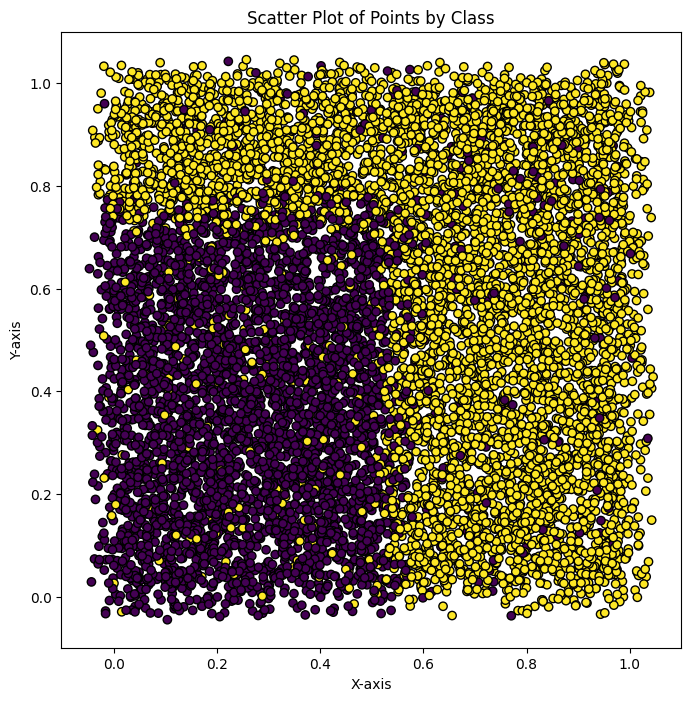

In [25]:
world = generate_world(None, 2)
print(world)
world = add_noise(world, errRange=0.05, mutation_rate=0.1)
# r = 0.9
# y1 = r*world[:, 1]+np.sqrt(1-r*r)*world[:, 1] 
# world = np.c_[world, add_noise(world[:, 1], errRange=0.05, mutation_rate=0.1)]
# world = np.c_[world, add_noise(world[:, 2], errRange=0.05, mutation_rate=0.1)]

# world[:, 1] = add_noise(world[:, 1], errRange=0.05, mutation_rate=0.1)
# world[:, 2] = add_noise(world[:, 2], errRange=0.05, mutation_rate=0.1)

# print(np.corrcoef(world[:, 1], world[:, 3])[0, 1])
draw.draw_true_world(world)

In [67]:
np.corrcoef(world[:, 1], world[:, 3])[0,1]

0.9808630662046044